In [71]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [72]:
website_url = requests.get('https://www.basketball-reference.com/players/b/bealbr01/gamelog/2019')
soup = BeautifulSoup(website_url.content,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" data-root="/home/bbr/www" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/201904231" rel="dns-prefetch"/>
  <!-- no:cookie fast load the css.           -->
  <link crossorigin="" href="https://d2p3bygnnzw9w3.cloudfront.net" rel="preconnect"/>
  <link crossorigin="" href="https://d2cwpp38twqe55.cloudfront.net" rel="preconnect"/>
  <style>
   html,body{margin:0;padding:0;font:14px/1.25 "Helvetica Neue",helvetica,arial,sans-serif;color:#000}body{position:relative;background:#c9cbcd;z-index:0;-webkit-text-size-adjust:none;-moz-text-size-adjust:none;-ms-text-size-adjust:none}a img{border:0}ul,li,ol{margin:0;padding:0;list-style-type:none}table th,table td{border:0}iframe{max-width:10

In [73]:
My_table = soup.find('table',{'class':'row_summable sortable stats_table'})
My_table

<table class="row_summable sortable stats_table" data-cols-to-freeze="3" id="pgl_basic"><caption>2018-19 Regular Season Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
<th aria-label="Season Game" class=" poptip center" data-stat="game_season" data-tip="Season Game" scope="col">G</th>
<th aria-label="Date" class=" poptip sort_default_asc center" data-stat="date_game" scope="col">Date</th>
<th aria-label="Age of Player at the start of February 1st of that season." class=" poptip sort_default_asc center" data-stat="age" data-tip="Age of Player at the start of February 1st of that season." scope="col">Age</th>
<th aria-label="Team" class=" poptip sort_default_asc

In [74]:
tabledata = My_table.findAll('td')
tabledata

[<td class="right endpoint tooltip" data-endpoint="/play-index/pgl_cum_stats.cgi?player=bealbr01&amp;year=2019&amp;date_game=2018-10-18&amp;is_playoff_game=N" data-stat="game_season"><strong>1</strong></td>,
 <td class="left " data-stat="date_game"><a href="/boxscores/201810180WAS.html">2018-10-18</a></td>,
 <td class="right " data-stat="age">25-112</td>,
 <td class="left " data-stat="team_id"><a href="/teams/WAS/2019.html">WAS</a></td>,
 <td class="center iz" data-stat="game_location"></td>,
 <td class="left " data-stat="opp_id"><a href="/teams/MIA/2019.html">MIA</a></td>,
 <td class="center " csk="-1" data-stat="game_result">L (-1)</td>,
 <td class="right " data-stat="gs">1</td>,
 <td class="right " csk="1631" data-stat="mp">27:11</td>,
 <td class="right " data-stat="fg">7</td>,
 <td class="right " data-stat="fga">16</td>,
 <td class="right " data-stat="fg_pct">.438</td>,
 <td class="right " data-stat="fg3">2</td>,
 <td class="right " data-stat="fg3a">7</td>,
 <td class="right " data

In [75]:
data = []
for cell in tabledata:
    data.append(cell.get_text())
    
print(data)

['1', '2018-10-18', '25-112', 'WAS', '', 'MIA', 'L (-1)', '1', '27:11', '7', '16', '.438', '2', '7', '.286', '4', '6', '.667', '0', '1', '1', '2', '1', '0', '1', '5', '20', '10.5', '-6', '2', '2018-10-20', '25-114', 'WAS', '', 'TOR', 'L (-4)', '1', '35:14', '12', '21', '.571', '6', '11', '.545', '2', '4', '.500', '0', '3', '3', '6', '1', '1', '1', '5', '32', '25.1', '+3', '3', '2018-10-22', '25-116', 'WAS', '@', 'POR', 'W (+1)', '1', '43:05', '10', '25', '.400', '5', '9', '.556', '0', '1', '.000', '1', '7', '8', '7', '0', '1', '0', '3', '25', '18.3', '+7', '4', '2018-10-24', '25-118', 'WAS', '@', 'GSW', 'L (-22)', '1', '19:25', '10', '15', '.667', '1', '4', '.250', '2', '2', '1.000', '0', '3', '3', '4', '1', '0', '0', '3', '23', '20.0', '-10', '5', '2018-10-26', '25-120', 'WAS', '@', 'SAC', 'L (-4)', '1', '39:01', '6', '19', '.316', '3', '11', '.273', '6', '6', '1.000', '0', '5', '5', '0', '2', '0', '5', '5', '21', '6.6', '-7', '6', '2018-10-28', '25-122', 'WAS', '@', 'LAC', 'L (-32)',

In [76]:
import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 29))
refined

array([['1', '2018-10-18', '25-112', ..., '20', '10.5', '-6'],
       ['2', '2018-10-20', '25-114', ..., '32', '25.1', '+3'],
       ['3', '2018-10-22', '25-116', ..., '25', '18.3', '+7'],
       ...,
       ['80', '2019-04-05', '25-281', ..., '25', '17.0', '-11'],
       ['81', '2019-04-07', '25-283', ..., '13', '6.7', '+3'],
       ['82', '2019-04-09', '25-285', ..., '16', '15.8', '+8']],
      dtype='<U10')

In [77]:
tableheader = My_table.findAll('th')
tableheader

[<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>,
 <th aria-label="Season Game" class=" poptip center" data-stat="game_season" data-tip="Season Game" scope="col">G</th>,
 <th aria-label="Date" class=" poptip sort_default_asc center" data-stat="date_game" scope="col">Date</th>,
 <th aria-label="Age of Player at the start of February 1st of that season." class=" poptip sort_default_asc center" data-stat="age" data-tip="Age of Player at the start of February 1st of that season." scope="col">Age</th>,
 <th aria-label="Team" class=" poptip sort_default_asc center" data-stat="team_id" data-tip="Team" scope="col">Tm</th>,
 <th aria-label=" " class=" poptip center" data-stat="game_location" scope="col"> </th>,
 <th aria-label="Opponent" class=" poptip sort_default_asc center" data-stat="opp_id" data-tip="Opponent" scope="col">Opp</th>,
 <th aria-label=" " class=" poptip center" data-stat="game_

In [78]:
headers = []
count = 0
for item in tableheader:
    if (count < 30):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')    
print(headers)

['G', 'Date', 'Age', 'Tm', '\xa0', 'Opp', '\xa0', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']


In [205]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)

In [206]:
df1.head()

,G,Date,Age,Tm,,Opp,,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2018-10-18,25-112,WAS,,MIA,L (-1),1,27:11,7,...,1,1,2,1,0,1,5,20,10.5,-6
1,2,2018-10-20,25-114,WAS,,TOR,L (-4),1,35:14,12,...,3,3,6,1,1,1,5,32,25.1,+3
2,3,2018-10-22,25-116,WAS,@,POR,W (+1),1,43:05,10,...,7,8,7,0,1,0,3,25,18.3,+7
3,4,2018-10-24,25-118,WAS,@,GSW,L (-22),1,19:25,10,...,3,3,4,1,0,0,3,23,20.0,-10
4,5,2018-10-26,25-120,WAS,@,SAC,L (-4),1,39:01,6,...,5,5,0,2,0,5,5,21,6.6,-7


In [207]:
df1 = df1.drop(['\xa0', '\xa0', 'Tm', 'Age', 'GS'], axis=1)
df1.head()

,G,Date,Opp,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2018-10-18,MIA,27:11,7,16,.438,2,7,.286,...,1,1,2,1,0,1,5,20,10.5,-6
1,2,2018-10-20,TOR,35:14,12,21,.571,6,11,.545,...,3,3,6,1,1,1,5,32,25.1,+3
2,3,2018-10-22,POR,43:05,10,25,.400,5,9,.556,...,7,8,7,0,1,0,3,25,18.3,+7
3,4,2018-10-24,GSW,19:25,10,15,.667,1,4,.250,...,3,3,4,1,0,0,3,23,20.0,-10
4,5,2018-10-26,SAC,39:01,6,19,.316,3,11,.273,...,5,5,0,2,0,5,5,21,6.6,-7


In [208]:
df1.columns

Index(['G', 'Date', 'Opp', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'GmSc', '+/-'],
      dtype='object')

## Correlation Matrix

#### There are a lot of features to look at here, so we will will start our predictive analysis by looking at how features are correlated to each other, and what features are the most important for predicting future stats

In [209]:
df2 = df1.drop(['Date', 'Opp', 'MP', '+/-'], axis=1)

In [210]:
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1,7,16,.438,2,7,.286,4,6,.667,0,1,1,2,1,0,1,5,20,10.5
1,2,12,21,.571,6,11,.545,2,4,.500,0,3,3,6,1,1,1,5,32,25.1
2,3,10,25,.400,5,9,.556,0,1,.000,1,7,8,7,0,1,0,3,25,18.3
3,4,10,15,.667,1,4,.250,2,2,1.000,0,3,3,4,1,0,0,3,23,20.0
4,5,6,19,.316,3,11,.273,6,6,1.000,0,5,5,0,2,0,5,5,21,6.6


In [211]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

In [212]:
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,-1.711055,-0.779921,-0.751793,-0.347639,-0.334806,-0.102656,-0.326419,-0.140722,0.156466,-0.618649,-0.841535,-1.386195,-1.504732,-1.152607,-0.374222,-0.820244,-0.933645,1.526774,-0.763829,-1.162305
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,-0.841535,-0.438962,-0.754653,0.178573,-0.374222,0.339411,-0.933645,1.526774,0.873660,0.818212
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,-0.066188,1.455505,1.120545,0.511368,-1.161049,0.339411,-1.472792,0.165954,-0.081542,-0.104220
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,-0.841535,-0.438962,-0.754653,-0.487017,-0.374222,-0.820244,-1.472792,0.165954,-0.354456,0.126388
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,-0.841535,0.508272,-0.004574,-1.818196,0.412604,-0.820244,1.222943,1.526774,-0.627371,-1.691347


AxesSubplot(0.127273,0.125;0.617727x0.755)


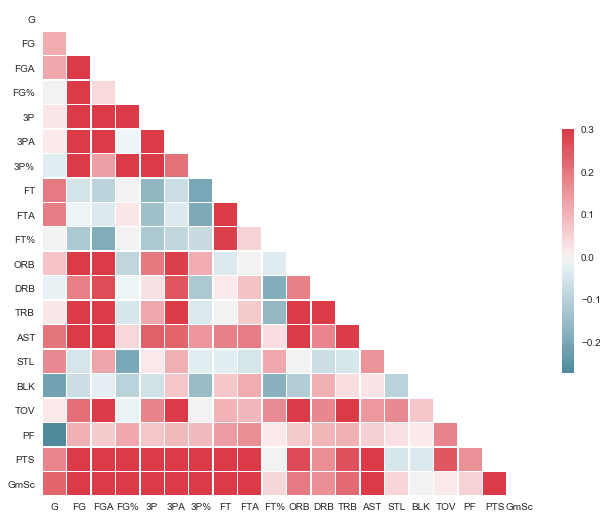

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [88]:
df3 = df2.copy(deep=True)
df3['PTS'] = df2.PTS.shift(-1)
df3 = df3.dropna()
df3.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,-1.711055,-0.779921,-0.751793,-0.347639,-0.334806,-0.102656,-0.326419,-0.140722,0.156466,-0.618649,-0.841535,-1.386195,-1.504732,-1.152607,-0.374222,-0.820244,-0.933645,1.526774,0.873660,-1.162305
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,-0.841535,-0.438962,-0.754653,0.178573,-0.374222,0.339411,-0.933645,1.526774,-0.081542,0.818212
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,-0.066188,1.455505,1.120545,0.511368,-1.161049,0.339411,-1.472792,0.165954,-0.354456,-0.104220
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,-0.841535,-0.438962,-0.754653,-0.487017,-0.374222,-0.820244,-1.472792,0.165954,-0.627371,0.126388
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,-0.841535,0.508272,-0.004574,-1.818196,0.412604,-0.820244,1.222943,1.526774,-0.763829,-1.691347


AxesSubplot(0.127273,0.125;0.617727x0.755)


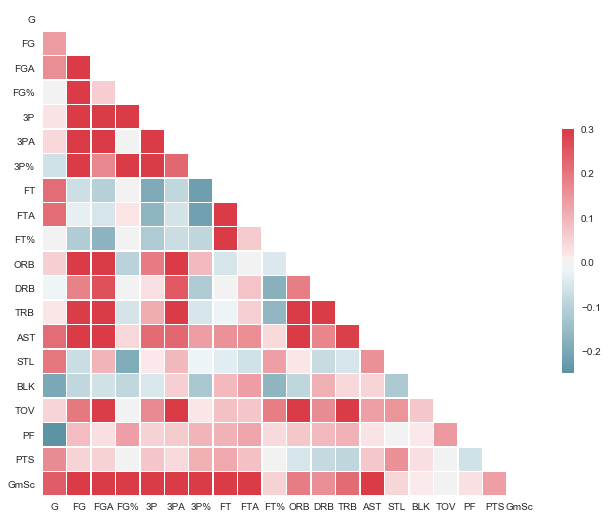

In [89]:
sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

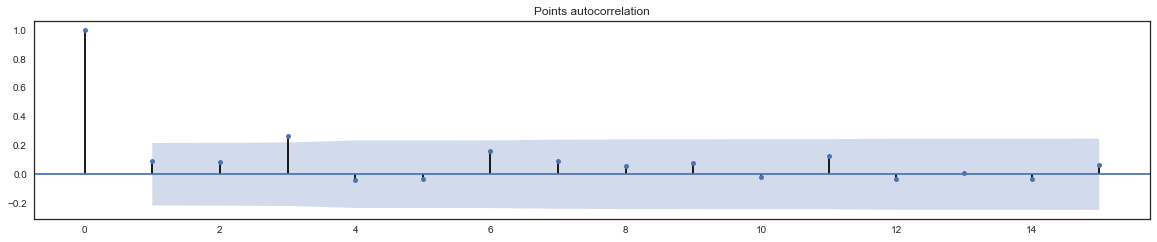

In [90]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.PTS, lags=15, ax=ax1, title= 'Points autocorrelation')

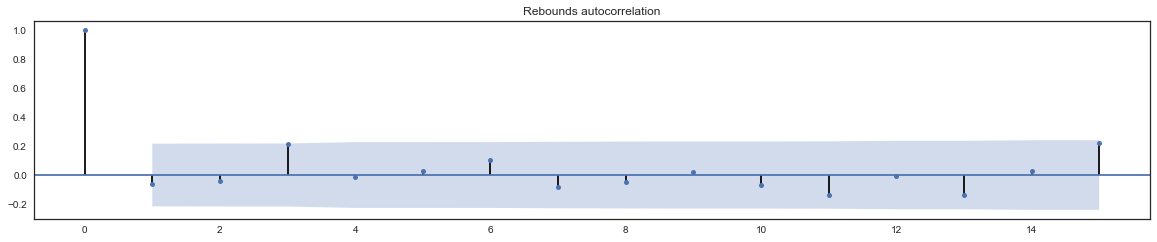

In [91]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.TRB, lags=15, ax=ax1, title='Rebounds autocorrelation')

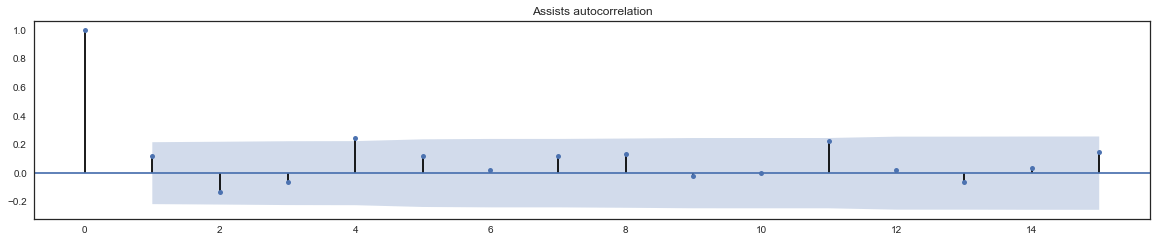

In [92]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.AST, lags=15, ax=ax1, title='Assists autocorrelation')

### Trend analysis

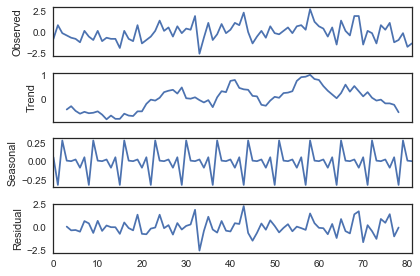

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
result = seasonal_decompose(df2.PTS, model='additive', freq=7)
result.plot()
plt.show()

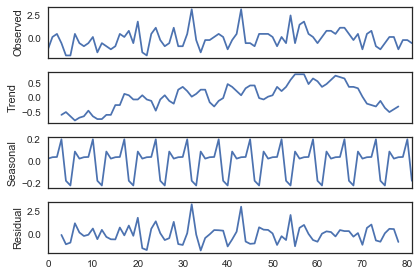

In [94]:
result = seasonal_decompose(df2.AST, model='additive', freq=7)
result.plot()
plt.show()

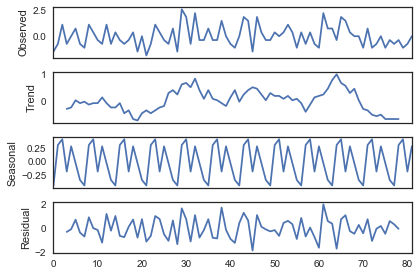

In [95]:
result = seasonal_decompose(df2.TRB, model='additive', freq=7)
result.plot()
plt.show()

In [213]:
df2['Date'] = df1['Date']
df2['Opp'] = df1['Opp']

In [214]:
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Date,Opp
0,-1.711055,-0.779921,-0.751793,-0.347639,-0.334806,-0.102656,-0.326419,-0.140722,0.156466,-0.618649,...,-1.504732,-1.152607,-0.374222,-0.820244,-0.933645,1.526774,-0.763829,-1.162305,2018-10-18,MIA
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,-0.754653,0.178573,-0.374222,0.339411,-0.933645,1.526774,0.873660,0.818212,2018-10-20,TOR
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,1.120545,0.511368,-1.161049,0.339411,-1.472792,0.165954,-0.081542,-0.104220,2018-10-22,POR
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,-0.754653,-0.487017,-0.374222,-0.820244,-1.472792,0.165954,-0.354456,0.126388,2018-10-24,GSW
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,-0.004574,-1.818196,0.412604,-0.820244,1.222943,1.526774,-0.627371,-1.691347,2018-10-26,SAC


In [215]:
#do MJ prediction/Do a team(GSW?) prediction/collegetoNBA

In [216]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Week'] = df2['Date'].dt.week
df2['Yearday'] = df2['Date'].dt.dayofyear
df2['Rest'] = df2['Date'].dt.dayofyear.diff()%365
df2 = df2.dropna()

In [217]:
df2.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PF,PTS,GmSc,Date,Opp,Year,Month,Week,Yearday,Rest
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,1.526774,0.873660,0.818212,2018-10-20,TOR,2018,10,42,293,2.0
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,0.165954,-0.081542,-0.104220,2018-10-22,POR,2018,10,43,295,2.0
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,0.165954,-0.354456,0.126388,2018-10-24,GSW,2018,10,43,297,2.0
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,1.526774,-0.627371,-1.691347,2018-10-26,SAC,2018,10,43,299,2.0
5,-1.499814,-0.443323,-0.751793,0.254130,-0.944898,-0.485282,-1.064418,-0.480110,-0.135130,-0.926865,...,0.165954,-0.763829,-1.203000,2018-10-28,LAC,2018,10,43,301,2.0


In [218]:
df2 = df2.drop(['Date'], axis=1)

In [219]:
df2.columns

Index(['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', 'Opp',
       'Year', 'Month', 'Week', 'Yearday', 'Rest'],
      dtype='object')

In [220]:
#Do prediction for pts, reb, ast

In [221]:
df4 = df2.copy(deep=True)
df4['Opp'] = df4.Opp.shift(-1)
df4['Year'] = df4.Year.shift(-1)
df4['Month'] = df4.Month.shift(-1)
df4['Week'] = df4.Week.shift(-1)
df4['Yearday'] = df4.Yearday.shift(-1)
df4['Rest'] = df4.Rest.shift(-1)

In [222]:
dum1 = pd.get_dummies(df4['Opp'])
df4 = pd.concat([df4, dum1], axis=1)
df4 = df4.drop(['Opp'], axis=1)

In [223]:
df4['PredPts'] = df4.PTS.shift(-1)
df4['PredTrb'] = df4.TRB.shift(-1)
df4['PredAst'] = df4.AST.shift(-1)
df4 = df4.dropna()

In [224]:
df4 = df4.drop(['DRB', 'TRB','ORB','PF','TOV'], axis=1)
df4.head()

,G,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,PHI,PHO,POR,SAC,SAS,TOR,UTA,PredPts,PredTrb,PredAst
1,-1.668807,0.903066,0.286036,0.943252,2.105559,1.427850,1.279812,-0.819498,-0.426725,-1.386890,...,0,0,1,0,0,0,0,-0.081542,1.120545,0.511368
2,-1.626559,0.229871,1.116298,-0.716465,1.495468,0.662597,1.348030,-1.498275,-1.301511,-3.687016,...,0,0,0,0,0,0,0,-0.354456,-0.754653,-0.487017
3,-1.584311,0.229871,-0.959358,1.875023,-0.944898,-1.250536,-0.549679,-0.819498,-1.009915,0.913235,...,0,0,0,1,0,0,0,-0.627371,-0.004574,-1.818196
4,-1.542062,-1.116518,-0.129096,-1.531764,0.275285,1.427850,-0.407041,0.538054,0.156466,0.913235,...,0,0,0,0,0,0,0,-0.763829,0.745506,-1.818196
5,-1.499814,-0.443323,-0.751793,0.254130,-0.944898,-0.485282,-1.064418,-0.480110,-0.135130,-0.926865,...,0,0,0,0,0,0,0,-1.173201,-0.754653,0.511368


In [225]:
#df4 = df4.sample(frac=1).reset_index(drop=True)
train=df4[0:(round(len(df4)*.9))] 
test=df4[(round(len(df4)*.9 - 1)):]
trains = np.split(train, [49], axis=1)
train_y=trains[1]
train_x=trains[0]
tests = np.split(test, [49], axis=1)
test_y=tests[1]
test_x=tests[0]

In [226]:
train_y.head()

,PredPts,PredTrb,PredAst
1,-0.081542,1.120545,0.511368
2,-0.354456,-0.754653,-0.487017
3,-0.627371,-0.004574,-1.818196
4,-0.763829,0.745506,-1.818196
5,-1.173201,-0.754653,0.511368


In [227]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

## Predicting Points

### Linear Regression

In [194]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.PredPts.values)
reg.score(train_x.values, train_y.PredPts.values)

reg.coef_

array([ 1.43280773e-01, -3.37564065e-01, -2.42743552e+00, -1.49429954e+02,
        1.19202787e+00, -2.35065510e+00, -2.37232969e+00,  2.52721600e+00,
       -5.01919661e+00, -1.22778620e+01, -2.39815234e-01, -9.34561829e-01,
       -1.34545546e-02,  3.04411574e+00,  2.34904483e-01, -4.28850668e+01,
        3.96912128e+00,  5.40279484e+00, -1.04633926e+00,  1.18069243e+00,
        3.11837851e-01, -6.71734353e-01,  8.86912969e-01, -2.72501725e+00,
        2.92658061e+00,  4.02110666e+00, -1.29934938e+00,  1.61079710e+01,
       -5.05714145e+00, -1.89475419e+01,  1.67821543e+01, -3.22350352e+00,
       -5.31571927e+00, -1.61708249e+00,  2.52406567e+00, -3.86968905e+00,
       -3.58815330e+00,  1.57282785e+00, -4.81126076e+00, -1.54833551e+00,
       -2.01513086e+00,  7.67648992e+00,  4.06586665e+00,  2.32807415e+01,
       -9.84846025e+00,  8.96563253e+00, -9.34608448e+00, -2.05247228e-02,
       -1.52174590e+01])

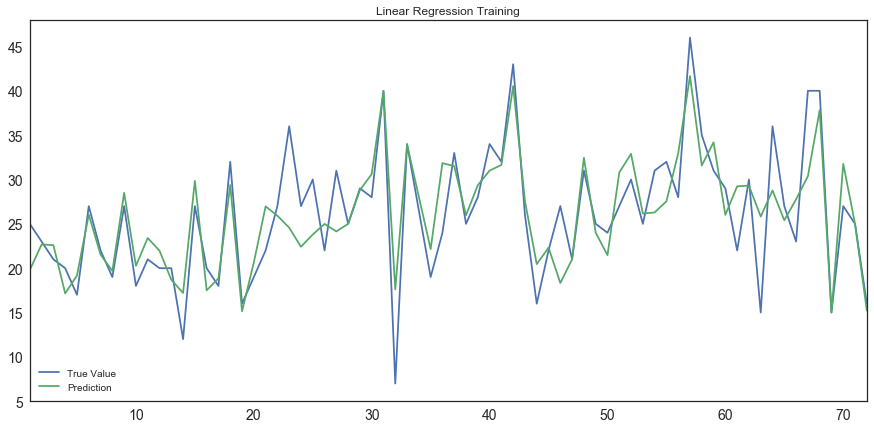

adj train r^2 = -0.060465013758076225
train mse = 17.097868370998096


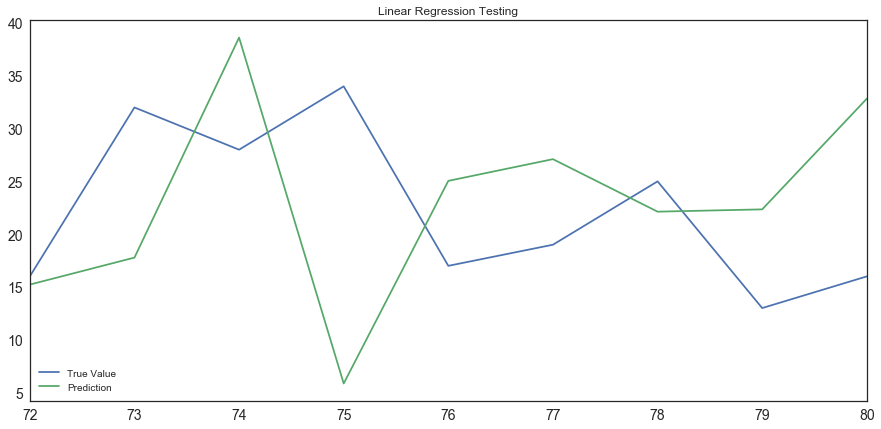

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'PTS', 'GmSc', 'Year', 'Month', 'Week', 'Yearday', 'Rest', 'ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA']
adj test r^2 = -10.334612937298175
test mse = 179.67460508013403


In [195]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Extra Trees

In [196]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.PredPts.values.ravel())

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

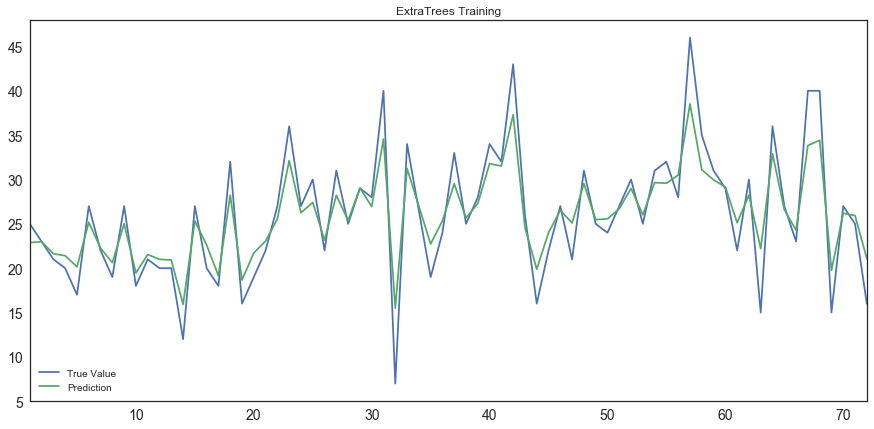

adj train r^2 = 0.4548159062576901
train mse = 8.789998492957745


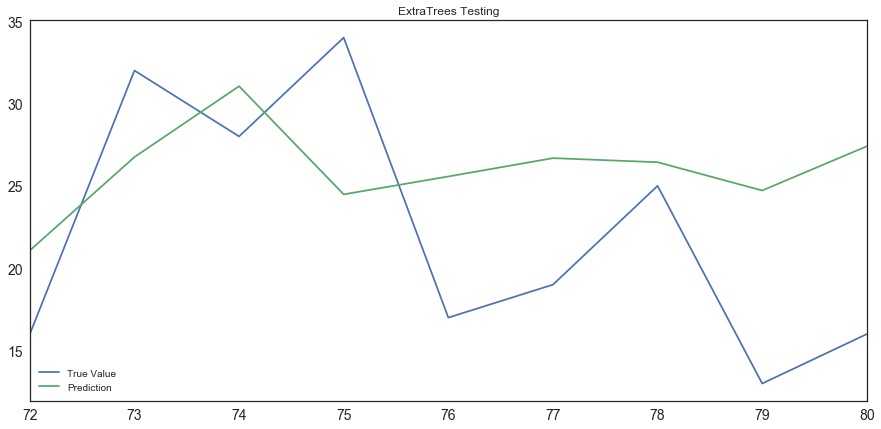

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'PTS', 'GmSc', 'Year', 'Month', 'Week', 'Yearday', 'Rest', 'ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA']
adj test r^2 = -2.8901425046728986
test mse = 61.66596266666669


In [197]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Random Forest

In [198]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PredPts.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

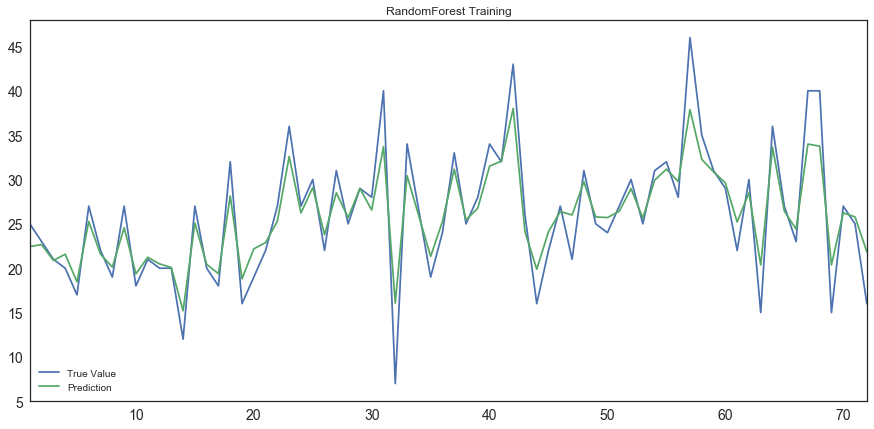

adj train r^2 = 0.47394584274570606
train mse = 8.481566690140841


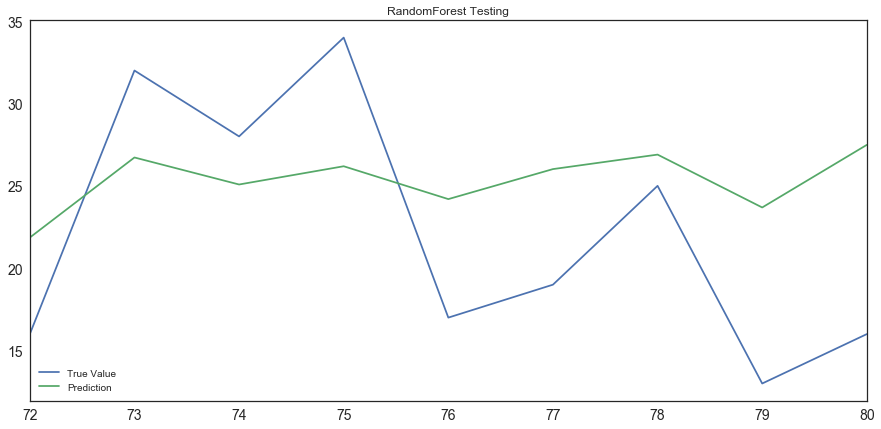

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'PTS', 'GmSc', 'Year', 'Month', 'Week', 'Yearday', 'Rest', 'ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA']
adj test r^2 = -2.381688289719626
test mse = 53.60602177777777


In [199]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### XGBoost

In [200]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.001)
reg.fit(train_x.values, train_y.PredPts.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

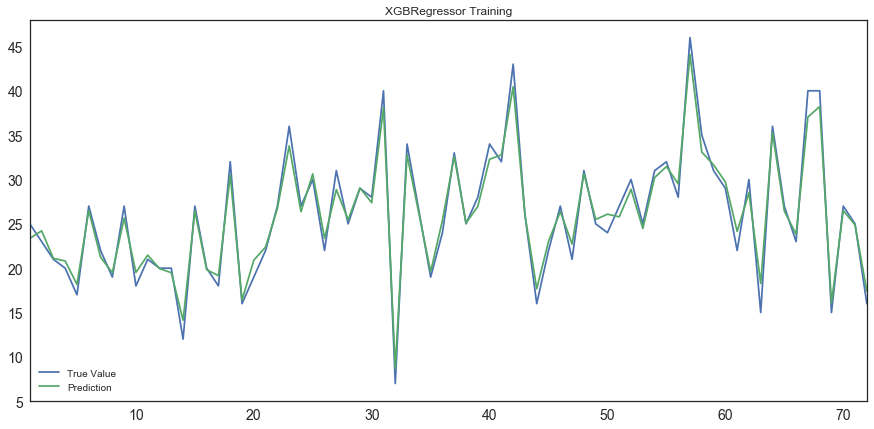

adj train r^2 = 0.8954365866705548
train mse = 1.6858750211791298


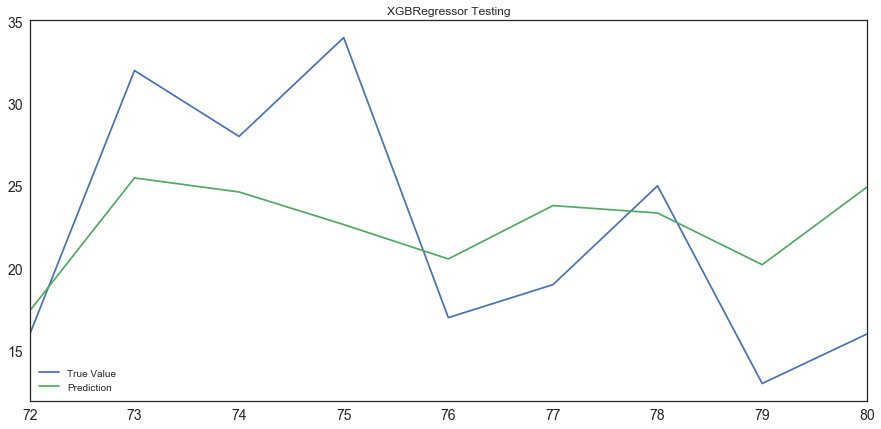

['G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'AST', 'STL', 'BLK', 'PTS', 'GmSc', 'Year', 'Month', 'Week', 'Yearday', 'Rest', 'ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA']
adj test r^2 = -1.4862696837955696
test mse = 39.41197869127791


In [201]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'XGBRegressor Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBRegressor Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'XGBRegressor Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'XGBRegressor Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### Neural Net

In [202]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [230]:
model = Sequential()
model.add(Dense(1280, input_dim=49, activation='tanh'))
#model.add(Dropout(0.003))
#model.add(Dense(640, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dense(200, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.PredPts.values.ravel(), validation_data=[test_x.values, test_y['PredPts'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Train on 71 samples, validate on 9 samples
Epoch 1/500
71/71 [==============================] - 1s 8ms/step - loss: 1.9389 - val_loss: 4.0526
Epoch 2/500
71/71 [==============================] - 0s 156us/step - loss: 3.4992 - val_loss: 0.9880
Epoch 3/500
71/71 [==============================] - 0s 186us/step - loss: 1.8173 - val_loss: 1.1083
Epoch 4/500
71/71 [==============================] - 0s 195us/step - loss: 1.4041 - val_loss: 1.2758
Epoch 5/500
71/71 [==============================] - 0s 181us/step - loss: 0.9815 - val_loss: 2.0545
Epoch 6/500
71/71 [==============================] - 0s 209us/step - loss: 1.2623 - val_loss: 1.4379
Epoch 7/500
71/71 [==============================] - 0s 205us/step - loss: 0.9513 - val_loss: 1.0239
Epoch 8/500
71/71 [==============================] - 0s 227us/step - loss: 1.0115 - val_loss: 1.0629
Epoch 9/500
71/71 [==============================] - 0s 186us/step - loss: 0.9176 - val_loss: 1.4379
Epoch 10/500
71/71 [==============================

71/71 [==============================] - 0s 204us/step - loss: 0.8373 - val_loss: 1.0623
Epoch 82/500
71/71 [==============================] - 0s 197us/step - loss: 0.8372 - val_loss: 0.9258
Epoch 83/500
71/71 [==============================] - 0s 186us/step - loss: 0.8312 - val_loss: 0.9609
Epoch 84/500
71/71 [==============================] - 0s 170us/step - loss: 0.8462 - val_loss: 0.9356
Epoch 85/500
71/71 [==============================] - 0s 203us/step - loss: 0.8458 - val_loss: 0.8918
Epoch 86/500
71/71 [==============================] - 0s 197us/step - loss: 0.8747 - val_loss: 0.9747
Epoch 87/500
71/71 [==============================] - 0s 222us/step - loss: 0.8353 - val_loss: 0.8223
Epoch 88/500
71/71 [==============================] - 0s 198us/step - loss: 0.8345 - val_loss: 0.9697
Epoch 89/500
71/71 [==============================] - 0s 197us/step - loss: 0.8339 - val_loss: 0.8419
Epoch 90/500
71/71 [==============================] - 0s 180us/step - loss: 0.8584 - val_loss: 

Epoch 161/500
71/71 [==============================] - 0s 193us/step - loss: 0.8206 - val_loss: 0.6563
Epoch 162/500
71/71 [==============================] - 0s 211us/step - loss: 0.7897 - val_loss: 0.5065
Epoch 163/500
71/71 [==============================] - 0s 207us/step - loss: 0.8288 - val_loss: 0.6274
Epoch 164/500
71/71 [==============================] - 0s 239us/step - loss: 0.7980 - val_loss: 0.5021
Epoch 165/500
71/71 [==============================] - 0s 237us/step - loss: 0.8015 - val_loss: 0.6496
Epoch 166/500
71/71 [==============================] - 0s 194us/step - loss: 0.7747 - val_loss: 0.5059
Epoch 167/500
71/71 [==============================] - 0s 184us/step - loss: 0.7822 - val_loss: 0.5940
Epoch 168/500
71/71 [==============================] - 0s 194us/step - loss: 0.7839 - val_loss: 0.4917
Epoch 169/500
71/71 [==============================] - 0s 183us/step - loss: 0.8352 - val_loss: 0.5710
Epoch 170/500
71/71 [==============================] - 0s 188us/step - lo

71/71 [==============================] - 0s 188us/step - loss: 0.7468 - val_loss: 0.4934
Epoch 241/500
71/71 [==============================] - 0s 206us/step - loss: 0.7201 - val_loss: 0.4195
Epoch 242/500
71/71 [==============================] - 0s 192us/step - loss: 0.7608 - val_loss: 0.5152
Epoch 243/500
71/71 [==============================] - 0s 203us/step - loss: 0.7224 - val_loss: 0.4176
Epoch 244/500
71/71 [==============================] - 0s 189us/step - loss: 0.7517 - val_loss: 0.5425
Epoch 245/500
71/71 [==============================] - 0s 184us/step - loss: 0.7213 - val_loss: 0.4124
Epoch 246/500
71/71 [==============================] - 0s 180us/step - loss: 0.7449 - val_loss: 0.5236
Epoch 247/500
71/71 [==============================] - 0s 184us/step - loss: 0.7272 - val_loss: 0.4063
Epoch 248/500
71/71 [==============================] - 0s 190us/step - loss: 0.7404 - val_loss: 0.5061
Epoch 249/500
71/71 [==============================] - 0s 184us/step - loss: 0.7158 - v

71/71 [==============================] - 0s 215us/step - loss: 0.6635 - val_loss: 0.3989
Epoch 320/500
71/71 [==============================] - 0s 175us/step - loss: 0.6915 - val_loss: 0.4916
Epoch 321/500
71/71 [==============================] - 0s 174us/step - loss: 0.6431 - val_loss: 0.4262
Epoch 322/500
71/71 [==============================] - 0s 241us/step - loss: 0.6546 - val_loss: 0.5201
Epoch 323/500
71/71 [==============================] - 0s 212us/step - loss: 0.6214 - val_loss: 0.4087
Epoch 324/500
71/71 [==============================] - 0s 196us/step - loss: 0.6245 - val_loss: 0.4956
Epoch 325/500
71/71 [==============================] - 0s 192us/step - loss: 0.6237 - val_loss: 0.4410
Epoch 326/500
71/71 [==============================] - 0s 184us/step - loss: 0.6323 - val_loss: 0.4358
Epoch 327/500
71/71 [==============================] - 0s 197us/step - loss: 0.6189 - val_loss: 0.4378
Epoch 328/500
71/71 [==============================] - 0s 190us/step - loss: 0.6454 - v

71/71 [==============================] - 0s 161us/step - loss: 0.5752 - val_loss: 0.3853
Epoch 399/500
71/71 [==============================] - 0s 179us/step - loss: 0.5567 - val_loss: 0.4811
Epoch 400/500
71/71 [==============================] - 0s 195us/step - loss: 0.6034 - val_loss: 0.3853
Epoch 401/500
71/71 [==============================] - 0s 208us/step - loss: 0.5974 - val_loss: 0.4935
Epoch 402/500
71/71 [==============================] - 0s 175us/step - loss: 0.5848 - val_loss: 0.3715
Epoch 403/500
71/71 [==============================] - 0s 235us/step - loss: 0.5394 - val_loss: 0.4856
Epoch 404/500
71/71 [==============================] - 0s 209us/step - loss: 0.5623 - val_loss: 0.3853
Epoch 405/500
71/71 [==============================] - 0s 202us/step - loss: 0.5359 - val_loss: 0.5121
Epoch 406/500
71/71 [==============================] - 0s 238us/step - loss: 0.5966 - val_loss: 0.3594
Epoch 407/500
71/71 [==============================] - 0s 213us/step - loss: 0.5662 - v

71/71 [==============================] - 0s 199us/step - loss: 0.5979 - val_loss: 0.4288
Epoch 478/500
71/71 [==============================] - 0s 193us/step - loss: 0.5766 - val_loss: 0.4513
Epoch 479/500
71/71 [==============================] - 0s 178us/step - loss: 0.5887 - val_loss: 0.4501
Epoch 480/500
71/71 [==============================] - 0s 211us/step - loss: 0.5720 - val_loss: 0.4610
Epoch 481/500
71/71 [==============================] - 0s 235us/step - loss: 0.5898 - val_loss: 0.4403
Epoch 482/500
71/71 [==============================] - 0s 240us/step - loss: 0.5759 - val_loss: 0.4560
Epoch 483/500
71/71 [==============================] - 0s 209us/step - loss: 0.5868 - val_loss: 0.4419
Epoch 484/500
71/71 [==============================] - 0s 213us/step - loss: 0.5740 - val_loss: 0.4592
Epoch 485/500
71/71 [==============================] - 0s 216us/step - loss: 0.5815 - val_loss: 0.4425
Epoch 486/500
71/71 [==============================] - 0s 214us/step - loss: 0.5818 - v

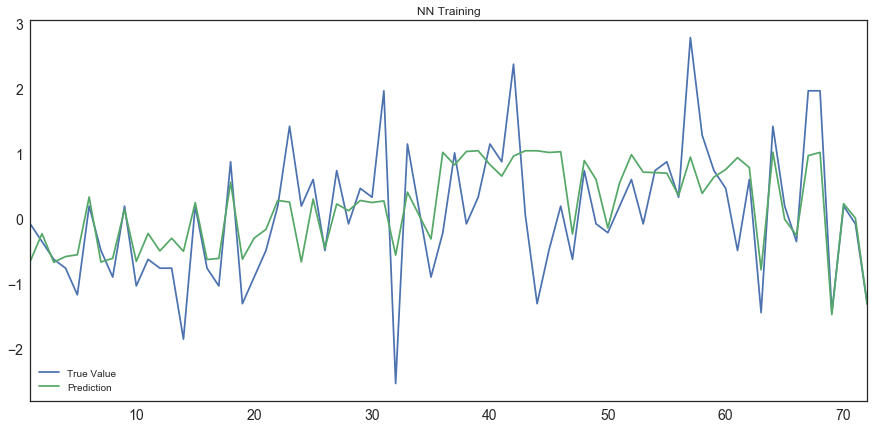

adj train r^2 = -0.8850451566248099
train mse = 0.565928525992161


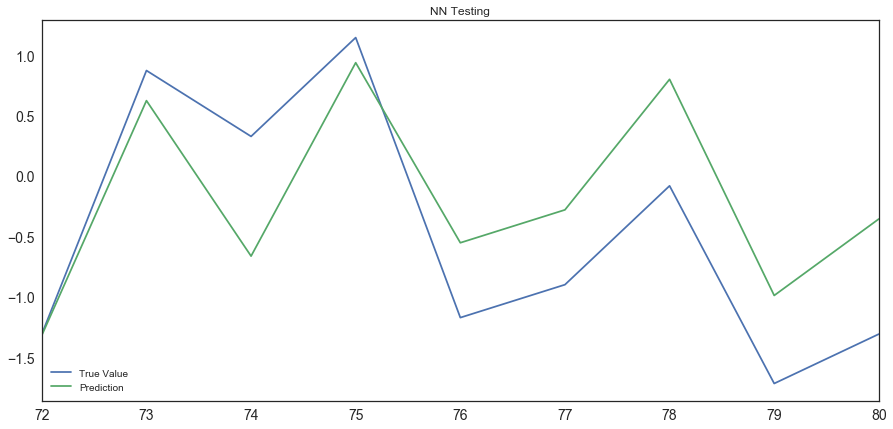

adj test r^2 = -0.5349373256595911
test mse = 0.4530695289992722


In [231]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model.predict(train_x.values)
test_y['prediction'] = model.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### LSTM

In [232]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [237]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='tanh'))
#model_lstm.add(LSTM(60, activation='relu',return_sequences=True))
#model_lstm.add(LSTM(60, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(LSTM(60, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.PredPts.values.ravel(), validation_data=[X_tst_t, test_y['PredPts'].values.ravel()], epochs=500, verbose=1, shuffle=False)

Train on 71 samples, validate on 9 samples
Epoch 1/500
71/71 [==============================] - 2s 24ms/step - loss: 1.1001 - val_loss: 1.2634
Epoch 2/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9379 - val_loss: 1.5953
Epoch 3/500
71/71 [==============================] - 0s 3ms/step - loss: 0.9023 - val_loss: 1.4445
Epoch 4/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9132 - val_loss: 1.3625
Epoch 5/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9176 - val_loss: 1.3484
Epoch 6/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9123 - val_loss: 1.3796
Epoch 7/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9048 - val_loss: 1.3726
Epoch 8/500
71/71 [==============================] - 0s 2ms/step - loss: 0.9066 - val_loss: 1.3591
Epoch 9/500
71/71 [==============================] - 0s 3ms/step - loss: 0.9044 - val_loss: 1.3848
Epoch 10/500
71/71 [==============================] - 0s 3ms/step

71/71 [==============================] - 0s 2ms/step - loss: 0.8619 - val_loss: 1.1710
Epoch 83/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8628 - val_loss: 1.2770
Epoch 84/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8566 - val_loss: 1.2220
Epoch 85/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8560 - val_loss: 1.1527
Epoch 86/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8543 - val_loss: 1.2009
Epoch 87/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8473 - val_loss: 1.1846
Epoch 88/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8519 - val_loss: 1.1936
Epoch 89/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8522 - val_loss: 1.1837
Epoch 90/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8491 - val_loss: 1.1996
Epoch 91/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8552 - val_loss: 1.1357
Epoch 92/500


71/71 [==============================] - 0s 2ms/step - loss: 0.7963 - val_loss: 0.9780
Epoch 164/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7893 - val_loss: 0.8938
Epoch 165/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7894 - val_loss: 0.8863
Epoch 166/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7884 - val_loss: 0.8688
Epoch 167/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7763 - val_loss: 0.8559
Epoch 168/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7923 - val_loss: 0.9301
Epoch 169/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7772 - val_loss: 0.8776
Epoch 170/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7683 - val_loss: 0.7899
Epoch 171/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7749 - val_loss: 0.7925
Epoch 172/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7670 - val_loss: 0.8652
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.7111 - val_loss: 0.6099
Epoch 245/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7129 - val_loss: 0.6171
Epoch 246/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7185 - val_loss: 0.6298
Epoch 247/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7170 - val_loss: 0.5803
Epoch 248/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7125 - val_loss: 0.6334
Epoch 249/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7223 - val_loss: 0.6377
Epoch 250/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7228 - val_loss: 0.5630
Epoch 251/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7072 - val_loss: 0.6514
Epoch 252/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7192 - val_loss: 0.6019
Epoch 253/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7008 - val_loss: 0.5580
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.6641 - val_loss: 0.5177
Epoch 326/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6585 - val_loss: 0.5066
Epoch 327/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6704 - val_loss: 0.5675
Epoch 328/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6709 - val_loss: 0.5197
Epoch 329/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6670 - val_loss: 0.4920
Epoch 330/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6648 - val_loss: 0.5082
Epoch 331/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6764 - val_loss: 0.4910
Epoch 332/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6571 - val_loss: 0.5067
Epoch 333/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6652 - val_loss: 0.4901
Epoch 334/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6665 - val_loss: 0.4949
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.6129 - val_loss: 0.4398
Epoch 407/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6177 - val_loss: 0.4733
Epoch 408/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6253 - val_loss: 0.4509
Epoch 409/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6085 - val_loss: 0.4463
Epoch 410/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6142 - val_loss: 0.4777
Epoch 411/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6224 - val_loss: 0.4637
Epoch 412/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6289 - val_loss: 0.4447
Epoch 413/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6047 - val_loss: 0.4740
Epoch 414/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6151 - val_loss: 0.4529
Epoch 415/500
71/71 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 0.4580
Epoc

71/71 [==============================] - 0s 2ms/step - loss: 0.5786 - val_loss: 0.5396
Epoch 488/500
71/71 [==============================] - 0s 2ms/step - loss: 0.5918 - val_loss: 0.4546
Epoch 489/500
71/71 [==============================] - 0s 2ms/step - loss: 0.5837 - val_loss: 0.4764
Epoch 490/500
71/71 [==============================] - 0s 2ms/step - loss: 0.5773 - val_loss: 0.4766
Epoch 491/500
71/71 [==============================] - 0s 2ms/step - loss: 0.5875 - val_loss: 0.4183
Epoch 492/500
71/71 [==============================] - 0s 2ms/step - loss: 0.5707 - val_loss: 0.4542
Epoch 493/500
71/71 [==============================] - 0s 2ms/step - loss: 0.5769 - val_loss: 0.4625
Epoch 494/500
71/71 [==============================] - 0s 2ms/step - loss: 0.5878 - val_loss: 0.4373
Epoch 495/500
71/71 [==============================] - 0s 2ms/step - loss: 0.5946 - val_loss: 0.4760
Epoch 496/500
71/71 [==============================] - 0s 2ms/step - loss: 0.5774 - val_loss: 0.4505
Epoc

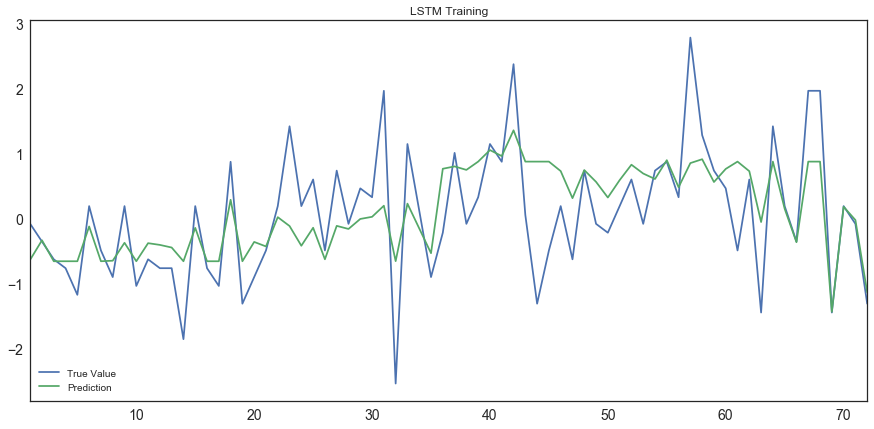

adj train r^2 = -0.8732227991431605
train mse = 0.5623792161415038


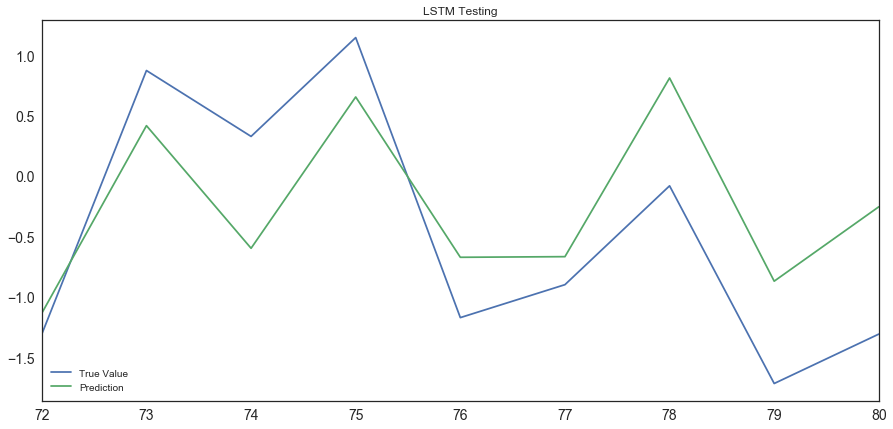

adj test r^2 = -0.607902563419014
test mse = 0.4746067770369247


In [238]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = model_lstm.predict(X_tr_t)
test_y['prediction'] = model_lstm.predict(X_tst_t)
train_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model_lstm.predict(X_tr_t))))
test_y['PredPts'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### TPOT

In [243]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=5, verbosity=2)
tpot.fit(train_x.values, train_y.PredPts.values.ravel())

Generation 1 - Current best internal CV score: -0.9882395001394911
Generation 2 - Current best internal CV score: -0.9882395001394911
Generation 3 - Current best internal CV score: -0.9882395001394911
Generation 4 - Current best internal CV score: -0.9882395001394911
Generation 5 - Current best internal CV score: -0.9795387926223432
Generation 6 - Current best internal CV score: -0.9795387926223432
Generation 7 - Current best internal CV score: -0.9698775092593095
Generation 8 - Current best internal CV score: -0.9698775092593095
Generation 9 - Current best internal CV score: -0.9698775092593095
Generation 10 - Current best internal CV score: -0.9698775092593095
Generation 11 - Current best internal CV score: -0.9698775092593095
Generation 12 - Current best internal CV score: -0.9698775092593095
Generation 13 - Current best internal CV score: -0.9698775092593095
Generation 14 - Current best internal CV score: -0.9675794774727333
Generation 15 - Current best internal CV score: -0.967579

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=5, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

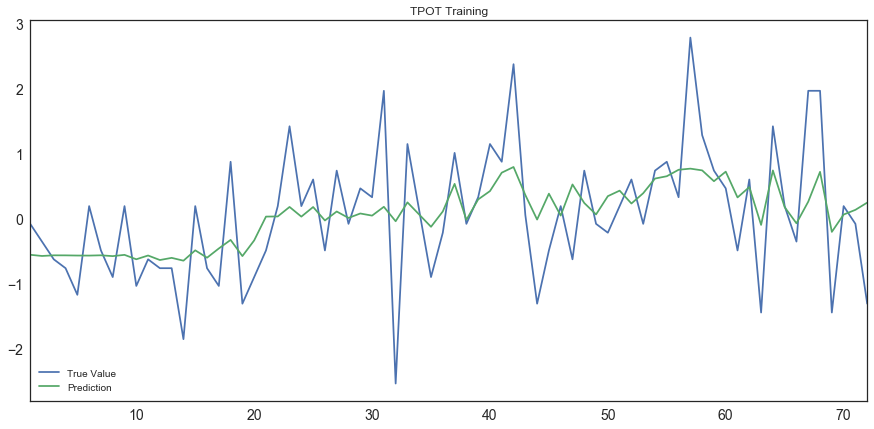

adj train r^2 = -1.107444460584051
train mse = 0.6326972767719532


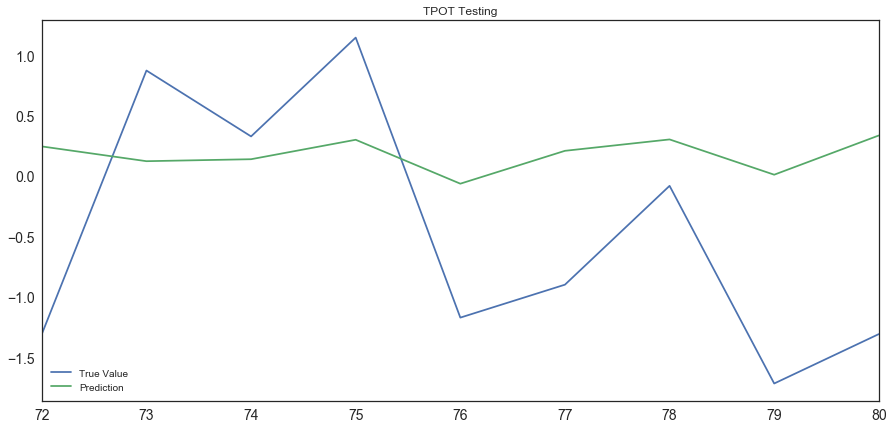

adj test r^2 = -3.5321108357558995
test mse = 1.337749292692492


In [244]:
train_y2 = train_y.copy(deep=False)
train_y2['prediction'] = tpot.predict(train_x.values)
test_y['prediction'] = tpot.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, train_y2.prediction)))
test_y['PredPts'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))